In [1]:
import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1 Simple Octave/MATLAB Function

As a quick warm up, create a function to return a 5x5 identity matrix.

In [2]:
A = np.eye(5)
print(A)

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


### 2 Linear Regression with One Variable

In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

You would like to use this data to help you select which city to expand to next. The file ex1data1.txt contains the dataset for our linear regression prob- lem. The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a loss.

### 2.1 Plotting the Data

Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). (Many other problems that you will encounter in real life are multi-dimensional and can't be plotted on a 2-d plot.)

In [3]:
datafile = 'ex1\\ex1data1.txt'
df = pd.read_csv(datafile, header=None, names=['Population', 'Profit'])

In [7]:
def plot_data(x, y):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, '.', label='Training Data')
    plt.xlabel("Population of City in 10,000s", fontsize=16)
    plt.ylabel("Profit in $10,000s", fontsize=16)

In [5]:
import os
import sys
import datetime as dt

In [6]:
fp_list_master = ['C:', 'Users', 'szahn', 'Dropbox', 'Statistics & Machine Learning', 'coursera_ml_notes']
fp = os.sep.join(fp_list_master)
fp_fig = fp + os.sep + 'LaTeX Notes' + os.sep + 'Figures'
print(os.path.isdir(fp), os.path.isdir(fp_fig))

True True


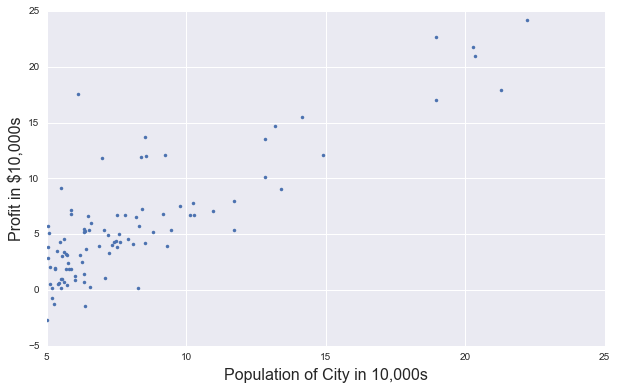

In [9]:
plot_data(df['Population'], df['Profit'])
#plt.savefig(fp_fig + os.sep + 'linreg_hw_2_1_plot_data.pdf')

### 2.2 Gradient Descent

In this part, you will fit the linear regression parameters $\theta$ to our dataset using gradient descent.

##### 2.2.1 Update Equations

The objective of linear regression is to minimize the cost function

$$
J\left( \theta \right) = \frac{1}{2m} \sum_{i=1}^m \left( h_\theta \left( x^{\left( i\right)} \right) - y^{\left( i \right)} \right)^2
$$

where $h_\theta\left( x \right)$ is the hypothesis given by the linear model

$$
h_\theta\left( x \right) = \theta^\intercal x = \theta_0 + \theta_1 x_1
$$

Recall that the parameters of your model are the $\theta_j$ values. These are the values you will adjust to minimize cost $J(\theta)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update

$$
\theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^m \left( h_\theta\left( x^{\left( i\right)} \right) - y^{\left(i\right)}\right) x_j^{\left(i\right)} \;\;\;\;\;\;\;\;\;\; \text{simultaneously update } \theta_j \text{ for all } j \text{.}
$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$.

##### 2.2.2 Implementation

In the following lines, we add another dimension to our data to accommodate the $\theta_0$ intercept term.

In [11]:
# set the number of training examples
m = len(df['Population'])

In [12]:
# create an array from the dataframe (missing column for x_0 values)
X = df['Population'].values

# add in the first column of the array for x_0 values
X = X[:, np.newaxis]
X = np.insert(X, 0, 1, axis=1)

In [13]:
y = df['Profit'].values
y = y[:, np.newaxis]

Let's make the (totally random) guess that $\theta_0$ = 0 and $\theta_1$ = 0. In that case, we have the following output from the hypothesis function.

In [14]:
theta_values = np.array([[0.], [0]])
print(theta_values.shape)
print(X.shape, end='\n\n')

_ = np.dot(X, theta_values)
print(_.shape)

(2, 1)
(97, 2)

(97, 1)


##### 2.2.3 Computing the Cost $J(\theta)$ 

Now, we can define our actual hypothesis function for linear regression with a single variable. 

In [15]:
# define the hypothesis
def h(theta, X):
    """Takes the dot product of the matrix X and the vector theta,
    yielding a predicted result.
    """
    return np.dot(X, theta)

In [16]:
def compute_cost(X, y, theta):
    """Takes the design matrix X and output vector y, and computes the cost of
    the parameters stored in the vector theta.
    
    The dimensions must be as follows:
    - X must be m x n
    - y must be m x 1
    - theta must be n x 1
    
    """
    m = len(y)
    
    J = 1 / (2*m) * np.dot((np.dot(X, theta) - y).T, (np.dot(X, theta) - y))
    return J

In [17]:
# define column vector theta = [[0], [0]]
theta = np.zeros((2, 1))

In [18]:
# compute the cost function for our existing X and y, with our new theta vector
# verify that the cost for our theta of zeros is 32.07
compute_cost(X, y, theta)

array([[ 32.07273388]])

##### Gradient Descent

Now we'll actually implement the gradient descent algorithm. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not $X$ and $y$. That is, we minimize $J(\theta)$ by changing $\theta$. We initialize the initial parameters to 0 and the learning rate alpha to 0.01.

In [19]:
def gradient_descent(X, y, theta, alpha, num_iters):
    """
    
    
    """
    m = len(y)
    J_history = []
    theta_history = []
    
    for i in range(num_iters):
        J_history.append(float(compute_cost(X, y, theta)))
        theta_history.append(theta)
        theta = theta - (alpha / m) * np.dot(X.T, (np.dot(X, theta) - y))
    
    return theta, J_history, theta_history

In [20]:
# set up some initial parameters for gradient descent
theta_initial = np.zeros((2, 1))
iterations = 1500
alpha = 0.01

In [21]:
theta_final, J_hist, theta_hist = gradient_descent(X, y, 
                                                   theta_initial, 
                                                   alpha, iterations)

After running the batch gradient descent algorithm, we can plot the convergence of $J(\theta)$ over the number of iterations.

In [26]:
def plot_cost_convergence(J_history):
    abscissa = list(range(len(J_history)))
    ordinate = J_history

    plt.figure(figsize=(10, 6))
    plt.plot(abscissa, ordinate, '.')
    plt.title('Convergence of the Cost Function', fontsize=24)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('Iteration Number', fontsize=18)
    plt.ylabel('Cost Function', fontsize=18)
    plt.xlim(min(abscissa) - max(abscissa) * 0.05, 1.05 * max(abscissa))

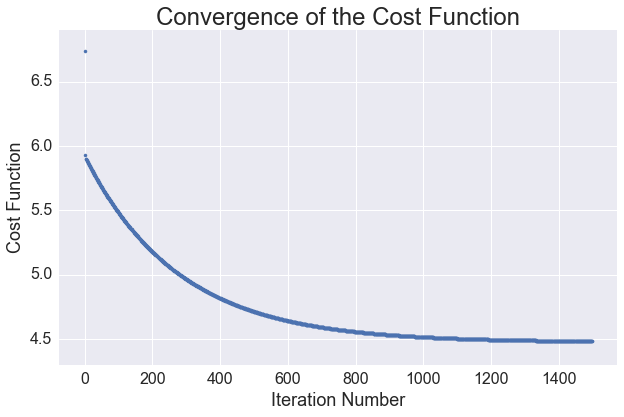

In [27]:
plot_cost_convergence(J_hist)
plt.ylim(4.3, 6.9)
#plt.savefig(fp_fig + os.sep + 'linreg_hw_2_4_viz_j_of_theta.pdf')

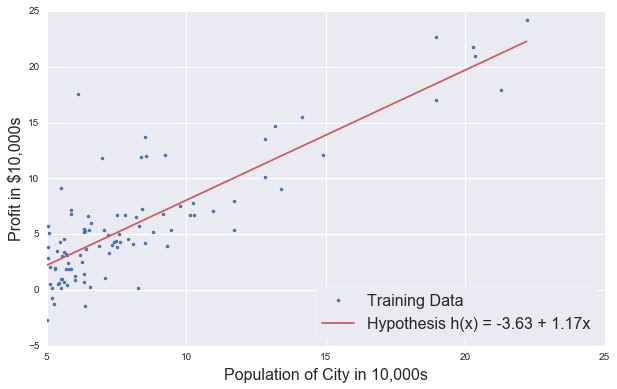

In [29]:
plot_data(df['Population'], df['Profit'])

x_min = min(df.Population)
x_max = max(df.Population)
abscissa = np.linspace(x_min, x_max, 50)
hypot = lambda x: theta_final[0] + theta_final[1] * x
ordinate = [hypot(x) for x in abscissa]
plt.plot(abscissa, ordinate, label='Hypothesis h(x) = {:.2f} + {:.2f}x'.format(
        float(theta_final[0]), float(theta_final[1])), color='indianred')

plt.legend(loc=4, frameon=True, fontsize=16)
# plt.savefig(fp_fig + os.sep + 'linreg_hw_2_3_plot_lin_reg.pdf')

### 2.4 Visualizing $J(\theta)$



In [30]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm

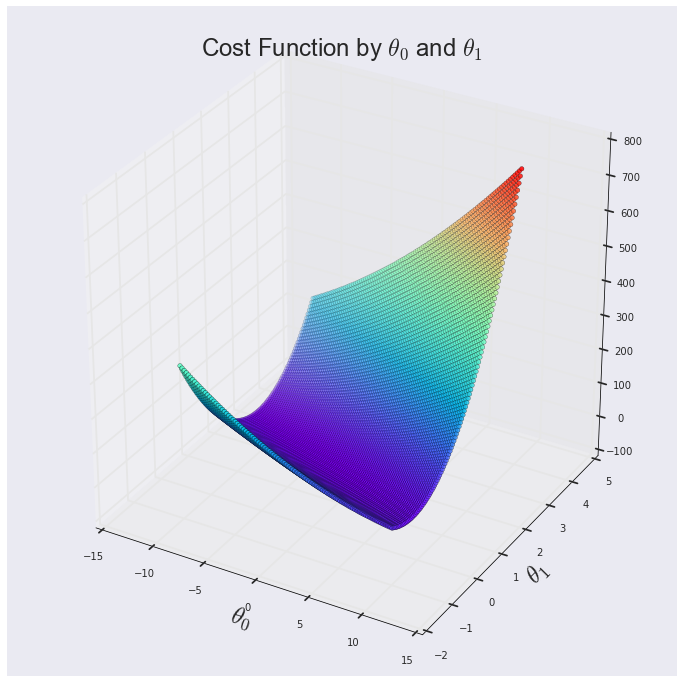

In [269]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')

theta_0_vals = np.linspace(-10, 10, 100)
theta_1_vals = np.linspace(-1, 4, 100)

theta1, theta2, cost = [], [], []

for t0 in theta_0_vals:
    for t1 in theta_1_vals:
        theta1.append(t0)
        theta2.append(t1)
        theta_array = np.array([[t0], [t1]])
        cost.append(compute_cost(X, y, theta_array))

scat = ax.scatter(theta1, theta2, cost, 
                  c=np.abs(cost), cmap=plt.get_cmap('rainbow'))
plt.xlabel(r'$\theta_0$', fontsize=24)
plt.ylabel(r'$\theta_1$', fontsize=24)
plt.title(r'Cost Function by $\theta_0$ and $\theta_1$', fontsize=24)

In [31]:
theta_0_hist = [x[0] for x in theta_hist]
theta_1_hist = [x[1] for x in theta_hist]
theta_hist_end = len(theta_0_hist) - 1

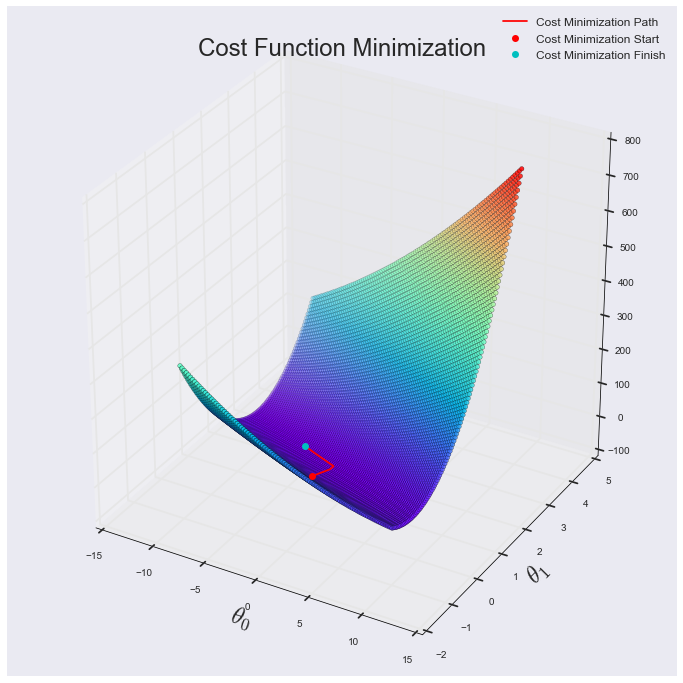

In [33]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')

theta_0_vals = np.linspace(-10, 10, 100)
theta_1_vals = np.linspace(-1, 4, 100)

theta1, theta2, cost = [], [], []

for t0 in theta_0_vals:
    for t1 in theta_1_vals:
        theta1.append(t0)
        theta2.append(t1)
        theta_array = np.array([[t0], [t1]])
        cost.append(compute_cost(X, y, theta_array))

scat = ax.scatter(theta1, theta2, cost, 
                  c=np.abs(cost), cmap=plt.get_cmap('rainbow'))

plt.plot(theta_0_hist, theta_1_hist, J_hist, 'r',
         label='Cost Minimization Path')
plt.plot(theta_0_hist[0], theta_1_hist[0], J_hist[0], 'ro',
         label='Cost Minimization Start')
plt.plot(theta_0_hist[theta_hist_end],
         theta_1_hist[theta_hist_end],
         J_hist[theta_hist_end], 'co', label='Cost Minimization Finish')

plt.xlabel(r'$\theta_0$', fontsize=24)
plt.ylabel(r'$\theta_1$', fontsize=24)
plt.title(r'Cost Function Minimization', fontsize=24)
plt.legend(fontsize=12)

plt.savefig(fp_fig + os.sep + 'linreg_hw_2_4_plot_surface_plot.pdf')

### 3 Linear Regression with Multiple Variables